In [8]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

data = {
    "Area": [850, 900, 1000, 1100, 1200, 1300, 1500, 1700, 2000, 2200],
    "Price": [9000, 10000, 11500, 13000, 15000, 16000, 18500, 21000, 25000, 28000]
}

df = pd.DataFrame(data)

df

,Area,Price
0,850,9000
1,900,10000
2,1000,11500
3,1100,13000
4,1200,15000
5,1300,16000
6,1500,18500
7,1700,21000
8,2000,25000
9,2200,28000


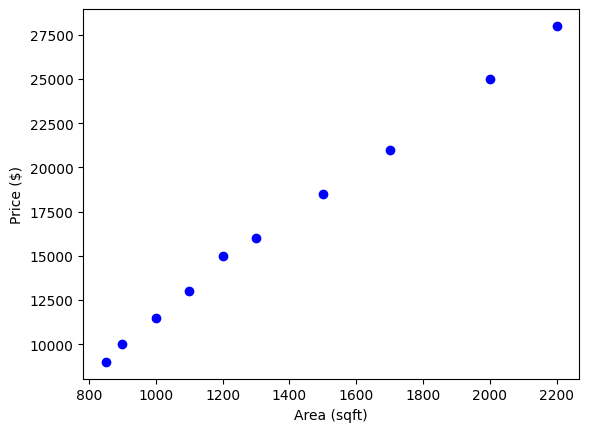

In [21]:
plt.xlabel("Area (sqft)")
plt.ylabel("Price ($)")
plt.scatter(df["Area"], df["Price"], color='blue')
plt.show()

In [25]:
model = LinearRegression()
X = df[["Area"]]
y = df["Price"]
model.fit(X, y)

y_pred = model.predict(X)

In [33]:
print(model.coef_[0], model.intercept_)

13.705844572896593 -2145.5362877328153


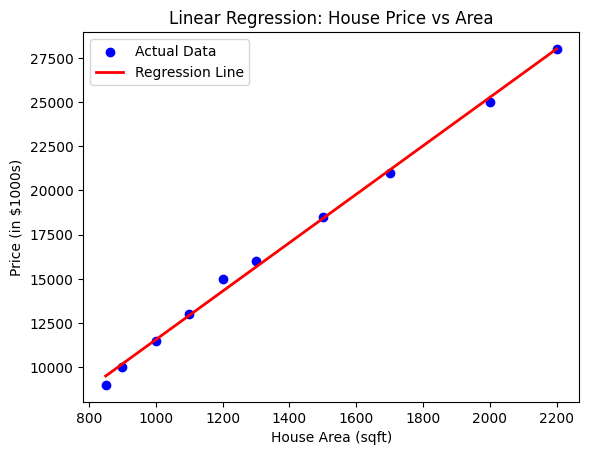

In [30]:
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("House Area (sqft)")
plt.ylabel("Price (in $1000s)")
plt.title("Linear Regression: House Price vs Area")
plt.legend()
plt.show()

In [34]:
error = mean_squared_error(y, y_pred)
print("Mean Squared Error:", error)

Mean Squared Error: 99659.60179832985


In [35]:
from sklearn.datasets import fetch_california_housing

In [37]:
housing = fetch_california_housing(as_frame=True)

In [39]:
df = housing.frame

In [40]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [63]:
from sklearn.model_selection import train_test_split
X = df[["MedInc"]]
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
y_pred = model.predict(X)

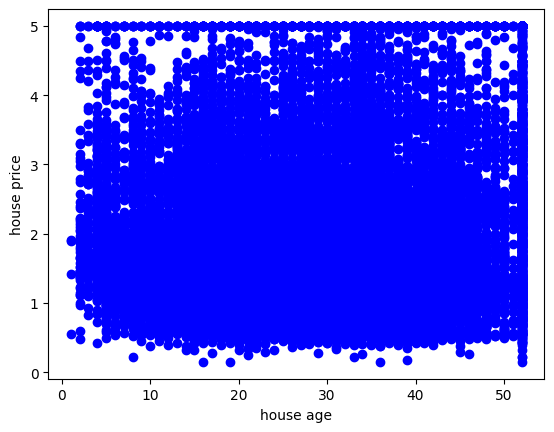

In [66]:
plt.scatter(df["HouseAge"], df["MedHouseVal"], color='blue')
plt.xlabel("house age")
plt.ylabel("house price")
plt.show()

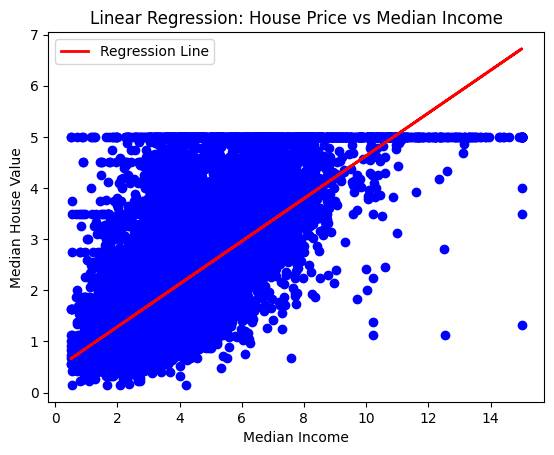

In [61]:
plt.scatter(df["MedInc"], df["MedHouseVal"], color='blue')
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression: House Price vs Median Income")
plt.legend()    
plt.show()


In [68]:

# Features (X) and target (y)
X = df.drop("MedHouseVal", axis=1)  # all columns except target
y = df["MedHouseVal"]               # median house value

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.5558915986952438
